<a href="https://colab.research.google.com/github/sfansaria/Machine-Learning/blob/main/Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



Predicted values [ 40600.91 123294.39  65033.07]
Real values      [ 37731. 122391.  57081.]
Trained W        9396.99
Trained b        26505.43


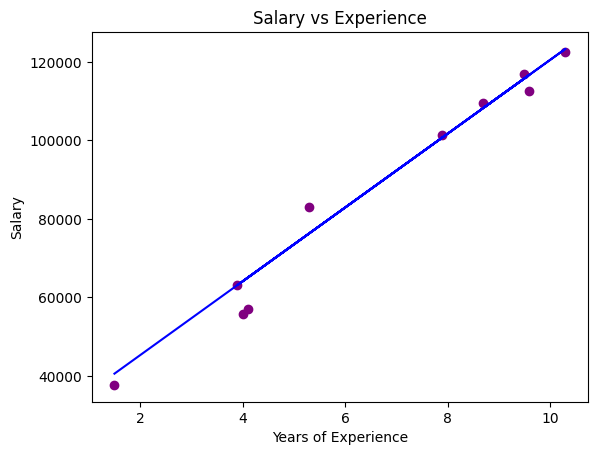

In [9]:
#Lasso Regression

class LassoRegression():
   def __init__(self,learning_rate, iterations, l1_penalty):
       self.learning_rate = learning_rate
       self.iterations = iterations
       self.l1_penalty = l1_penalty

   #function for model learning
   def fit(self, X, Y):
       #no_of_training_examples, no_of_features

       self.m, self.n = X.shape
       #Weight initialization
       self.W = np.zeros(self.n)
       self.b = 0
       self.X = X
       self.Y = Y

       #gradient descent learning
       for i in range(self.iterations):
           self.update_weights()
       return self
    #function to update weights in gradient descent

   def update_weights(self):
       Y_pred = self.predict(self.X)
       #calculate gradients
       dW = np.zeros(self.n)
       for j in range(self.n):
           if self.W[j] > 0:
                dW[j] = (-(2*(self.X[:,j]).dot(self.Y-Y_pred)) + self.l1_penalty) / self.m
           else:
                dW[j] = (-(2*(self.X[:,j]).dot(self.Y-Y_pred)) - self.l1_penalty) / self.m

       db = -2 * np.sum(self.Y - Y_pred) / self.m

       #Update weights
       self.W = self.W - self.learning_rate*dW
       self.b = self.b - self.learning_rate*db

       return self
   #Hypothetical function h(x)

   def predict(self, X):

       return X.dot(self.W)+self.b

def main():
    #IMporting data set
    df = pd.read_csv("/content/drive/My Drive/ml_datasets/salary_data.csv")
    X = df.iloc[:, :-1].values
    Y = df.iloc[:, 1].values

    #Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=0)

    #Model training
    model = LassoRegression(iterations=1000, learning_rate=0.01, l1_penalty=500)
    model.fit(X_train, Y_train)

    #Prediction on test set
    Y_pred = model.predict(X_test)
    print("Predicted values", np.round(Y_pred[:3], 2))
    print("Real values     ", Y_test[:3])
    print("Trained W       ", round(model.W[0], 2))
    print("Trained b       ", round(model.b, 2))

    #Visualization on test set
    plt.scatter(X_test, Y_test, color="purple")
    plt.plot(X_test, Y_pred, color="blue")
    plt.title('Salary vs Experience')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.show()


if __name__ == "__main__":
   main()

